In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [63]:
S_zad1 = pd.read_csv("./cmake-build-debug/S(iteration)zad1.csv")
S_zad2 = pd.read_csv("./cmake-build-debug/S(iteration)zad2.csv")
S_zad3 = pd.read_csv("./cmake-build-debug/S(iteration)zad3.csv")

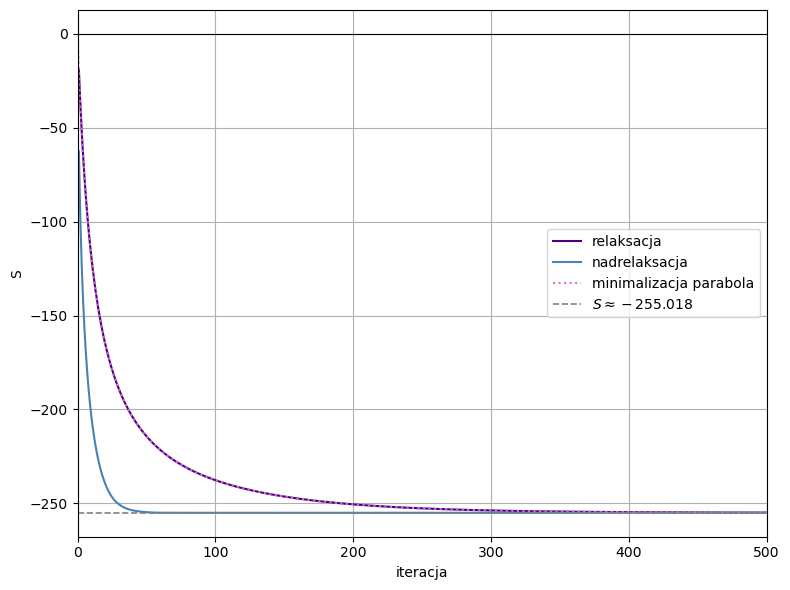

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(S_zad1["iteration"], S_zad1["S"], color="indigo", label="relaksacja")
plt.plot(S_zad2["iteration"], S_zad2["S"], color="steelblue", label="nadrelaksacja")
plt.plot(S_zad3["iteration"], S_zad3["S"], color="orchid", label="minimalizacja parabola", linestyle = ":")
plt.axhline(y=0, color="black", linestyle="-", linewidth=0.8)
plt.axhline(y=-255.018, color="gray", linestyle="--", linewidth=1.2, label=r"$S \approx  -255.018$")
plt.xlabel("iteracja")
plt.ylabel("S")
plt.xlim(0,500)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [66]:
betas = [0.25, 0.35, 0.45, 0.497, 0.5]
colors = ["indigo", "maroon", "forestgreen", "goldenrod", "steelblue"]
base_path = "./cmake-build-debug/S(iteration)[beta={:.6f}]zad4.csv"

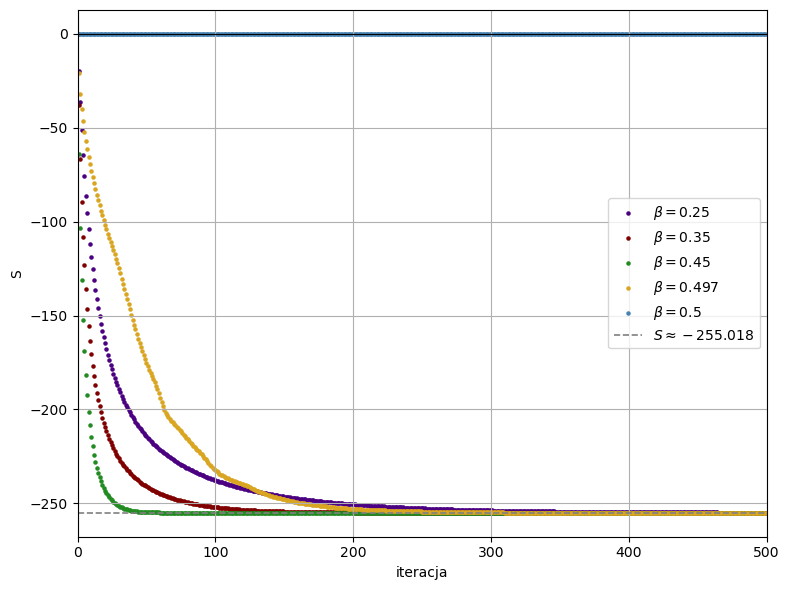

In [67]:
plt.figure(figsize=(8, 6))
for beta, color in zip(betas, colors):
    df = pd.read_csv(base_path.format(beta))
    plt.scatter(df["iteration"], df["S"], s=5, color=color, label=fr"$\beta = {beta}$")
plt.axhline(y=-255.018, color="gray", linestyle="--", linewidth=1.2, label=r"$S \approx -255.018$")
plt.axhline(y=0, color="black", linestyle="-", linewidth=0.8)

plt.xlabel("iteracja")
plt.ylabel("S")
plt.xlim(0, 500)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [68]:
data = {
    r"$u(x,y)$": {100: pd.read_csv("./cmake-build-debug/u(iter=100).csv"), 500: pd.read_csv("./cmake-build-debug/u(iter=500).csv")},
    r"$\rho '(x,y)$": {100: pd.read_csv("./cmake-build-debug/rhoPrim(iter=100).csv"), 500: pd.read_csv("./cmake-build-debug/rhoPrim(iter=500).csv")},
    r"$\delta(x,y)$": {100: pd.read_csv("./cmake-build-debug/delta(iter=100).csv"), 500: pd.read_csv("./cmake-build-debug/delta(iter=500).csv")}
}

In [69]:
def grid(df):
    i_vals = sorted(df["i"].unique())
    j_vals = sorted(df["j"].unique())
    Z = df.pivot(index='i', columns='j', values='value').values
    I, J = np.meshgrid(j_vals, i_vals)
    return I, J, Z

In [70]:
quantities = [r"$u(x,y)$", r"$\rho '(x,y)$", r"$\delta(x,y)$"]
iters = [100, 500]

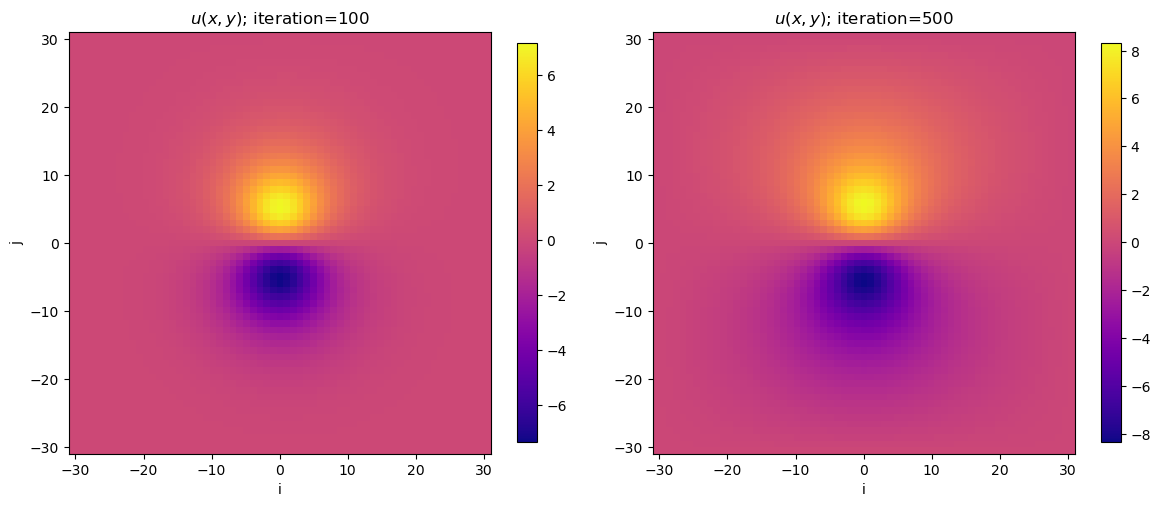

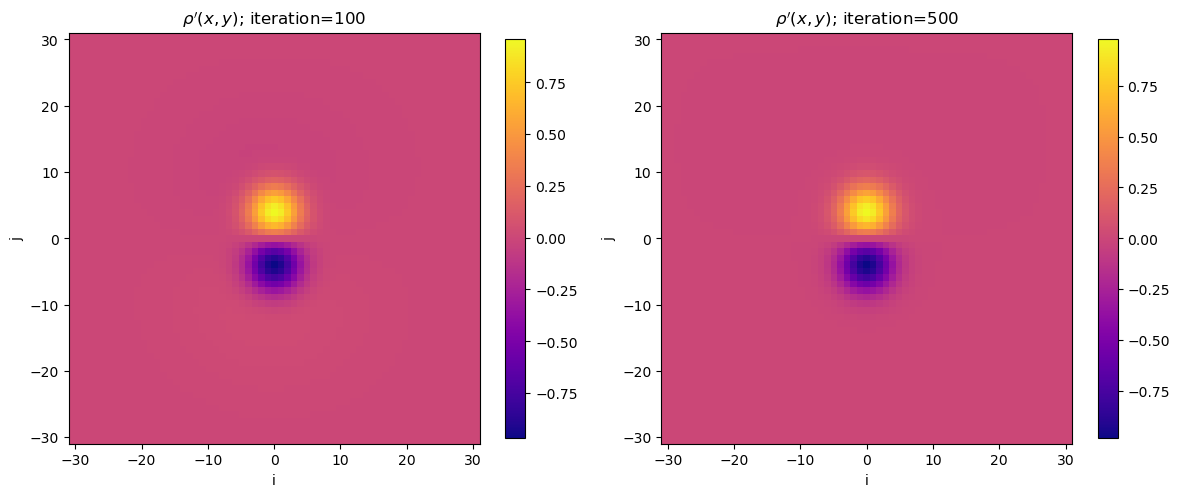

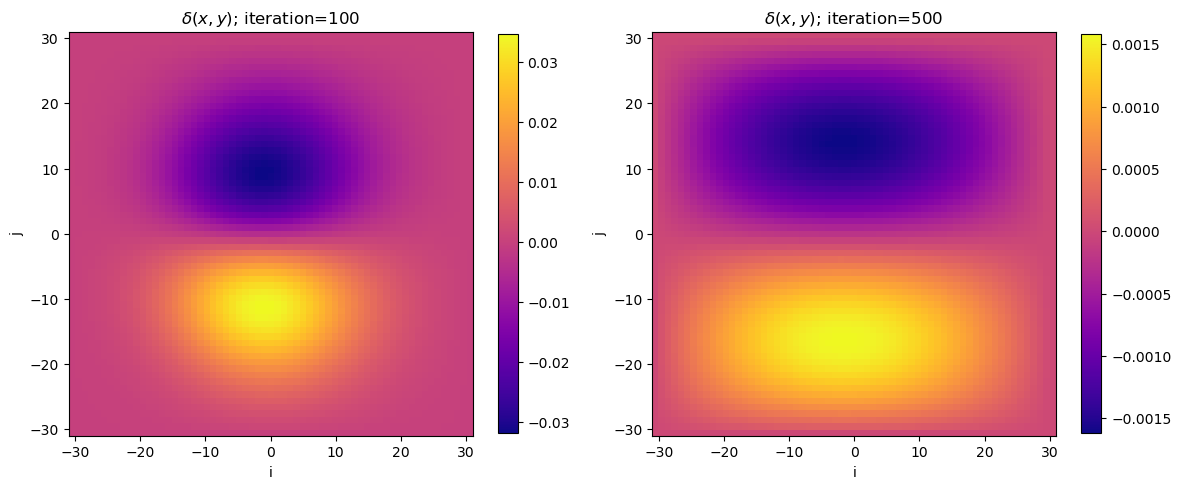

In [71]:
for key in quantities:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    for idx, it in enumerate(iters):
        I, J, Z = grid(data[key][it])
        ax = axes[idx]
        im = ax.imshow(Z, origin='lower', cmap='plasma', extent=[I.min(), I.max(), J.min(), J.max()])
        ax.set_title(f"{key}; iteration={it}")
        ax.set_xlabel("i")
        ax.set_ylabel("j")
        fig.colorbar(im, ax=ax, shrink=0.7)
    plt.tight_layout()
    plt.show()

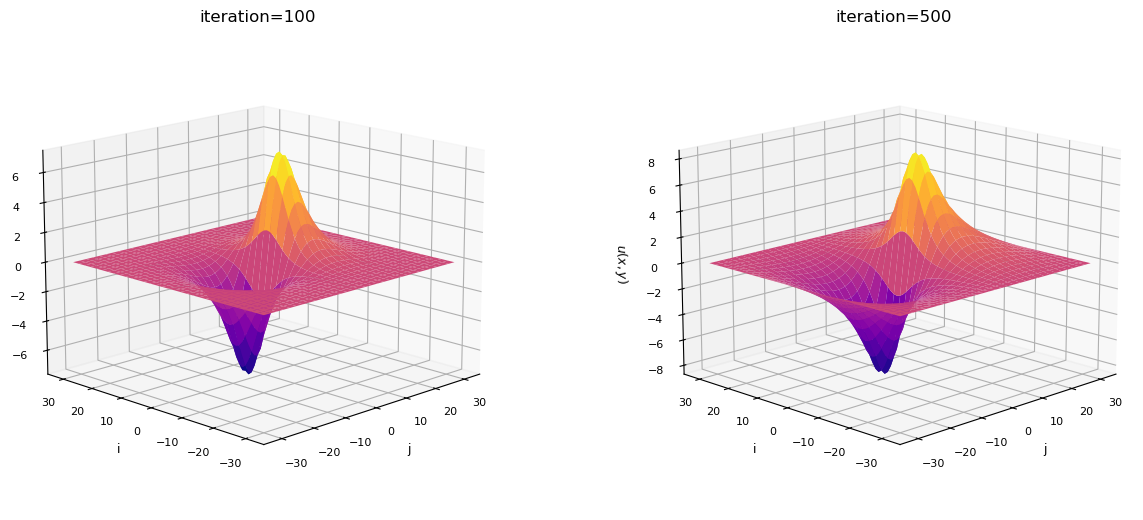

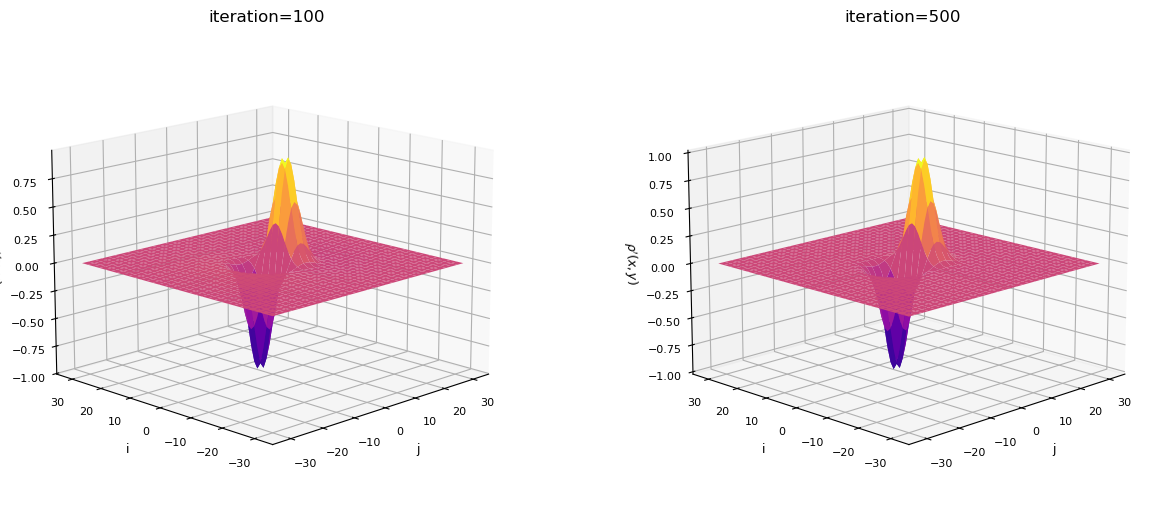

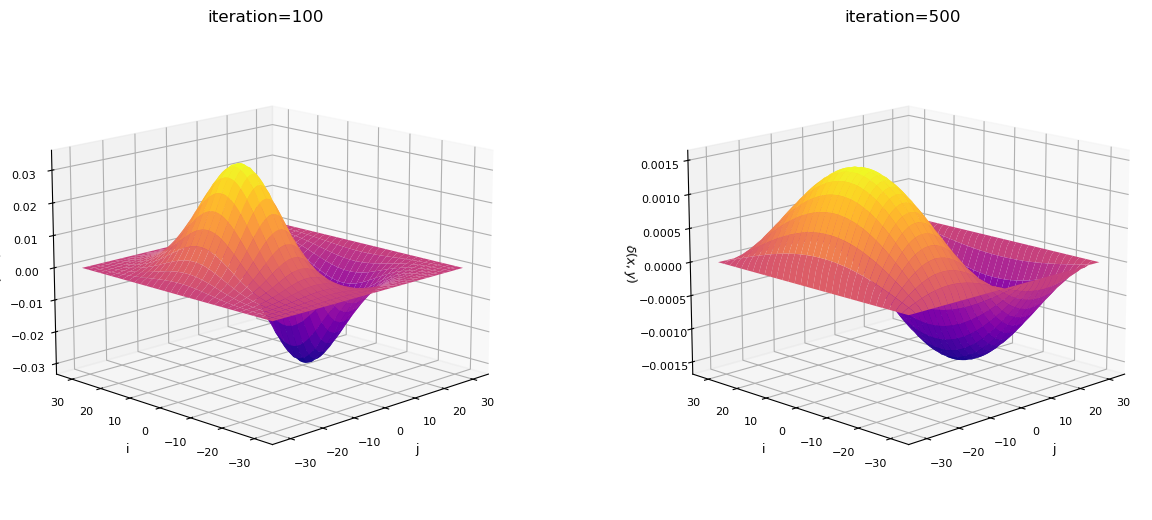

In [72]:
for key in quantities:
    fig = plt.figure(figsize=(14, 6))
    for idx, it in enumerate(iters):
        I, J, Z = grid(data[key][it])
        ax = fig.add_subplot(1, 2, idx + 1, projection='3d')
        ax.plot_surface(J, I, Z, cmap='plasma', edgecolor='none')
        ax.set_xlabel("j", fontsize=9)
        ax.set_ylabel("i", fontsize=9)
        ax.set_zlabel(f"{key}", fontsize=9)
        ax.set_title(f"iteration={it}")
        ax.tick_params(labelsize=8)
        ax.view_init(elev=15, azim=-135)

    fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.02)
    plt.show()
